<a href="https://colab.research.google.com/github/coolgalsandiego/linq-interview-questions/blob/main/Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction:

**Problem Statement:**

Suppose you are a data scientist working for a bank that recently conducted a marketing campaign to promote term deposits to its clients. The bank collected data on various client characteristics, such as age, job type, marital status, education level, and more. Your task is to analyze this dataset and build a machine learning model to predict whether a client will subscribe to a term deposit or not.

<center><img src="https://img.etimg.com/thumb/width-420,height-315,imgsize-51456,resizemode-75,msid-110798763/markets/stocks/news/will-short-term-narrative-headwinds-for-psu-banks-bring-back-mojo-to-private-sector-banks-5-banks-with-an-upside-potential-of-up-to-24/bankk.jpg"/></center>

By accurately predicting client subscription behavior, your model will enable the bank to optimize its marketing efforts. It will help identify potential clients who are more likely to subscribe to the term deposit, allowing the bank to focus its resources on targeting these individuals. This targeted approach will not only increase the effectiveness of the marketing campaign but also maximize the bank's return on investment.

# STEP 1: Import the necessary Libraries

In [1]:
# Import the necessary libraries
# Data manipulation and numerical operationsimport pandas as pd
import numpy as np
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning model metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Setting maximum limit of the number of columns visible
pd.set_option('display.max_columns', 30)

# STEP 2: Loading the Data

**Dataset Information:**
Content: Each row represents a customer, and each column contains attributes related to the customer's socio-economic background, bank contact information, and the outcome of a marketing campaign.

The dataset includes information about:

- **Demographic Information:** Age, job type, marital status, education level, whether the customer has a loan or housing loan, and whether they have defaulted on a loan.

- **Bank Contact Information:** The method of contact (cellular, telephone), last contact month, last contact day of the week, duration of the last contact, and number of contacts performed during this campaign.

- **Socio-Economic Indicators:** Employment variation rate, consumer price index, consumer confidence index, Euribor 3-month rate, and the number of employees.

- **Campaign Outcome:** Whether the client has subscribed to a term deposit (the column is called y).

### 2.1 Load the data & view it

*Hint: Use `;` as the delimiter.*

In [4]:


# Loading the data
# Read the csv file

# Viewing the data
from google.colab import drive
drive.mount('/content/drive')


data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/bank_data.csv",delimiter=";")

# View the data
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### 2.2 View the columns of the data and understand them

In [5]:
# View the columns of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### 2.3 Check the shape of the dataset

In [7]:
# Checking the shape of the data
data.shape

(41188, 21)

### 2.4 Understand the datatypes of each of the columns

In [10]:
# Check the dataset info
data.y.value_counts(normalize=True)
#data.job.value_counts(normalize=True)

,proportion
y,
no,0.887346
yes,0.112654


# STEP 3: EDA

### 3.1 Check the distribution of the target variable - `y`.

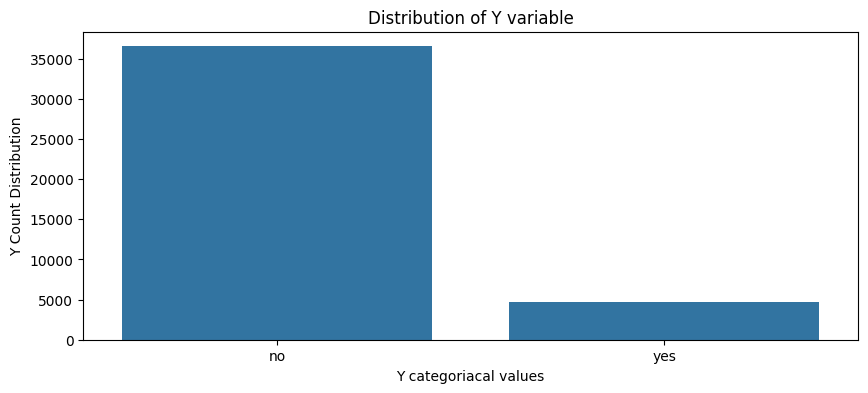

In [16]:
# Checking the distribution of the target variable 'y'

# Set the figure size for better readability
plt.figure(figsize=(10,4))

# Create a count plot for the 'y' variable in the dataset
sns.countplot(data=data, x="y")


# Add a title to the plot
plt.title("Distribution of Y variable")

# Label the x-axis
plt.xlabel("Y categoriacal values")

# Label the y-axis
plt.ylabel("Y Count Distribution")


# Display the plot
plt.show()


### 3.2 Do an analysis of the `Subscription Rate` variable wrt all the categorical variables

*Hint: Use normalized values to plot to avoid the class imbalance problem.*

In [19]:
# Listing all the categorical columns
data.columns
data.dtypes
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
print(categorical_columns)


['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


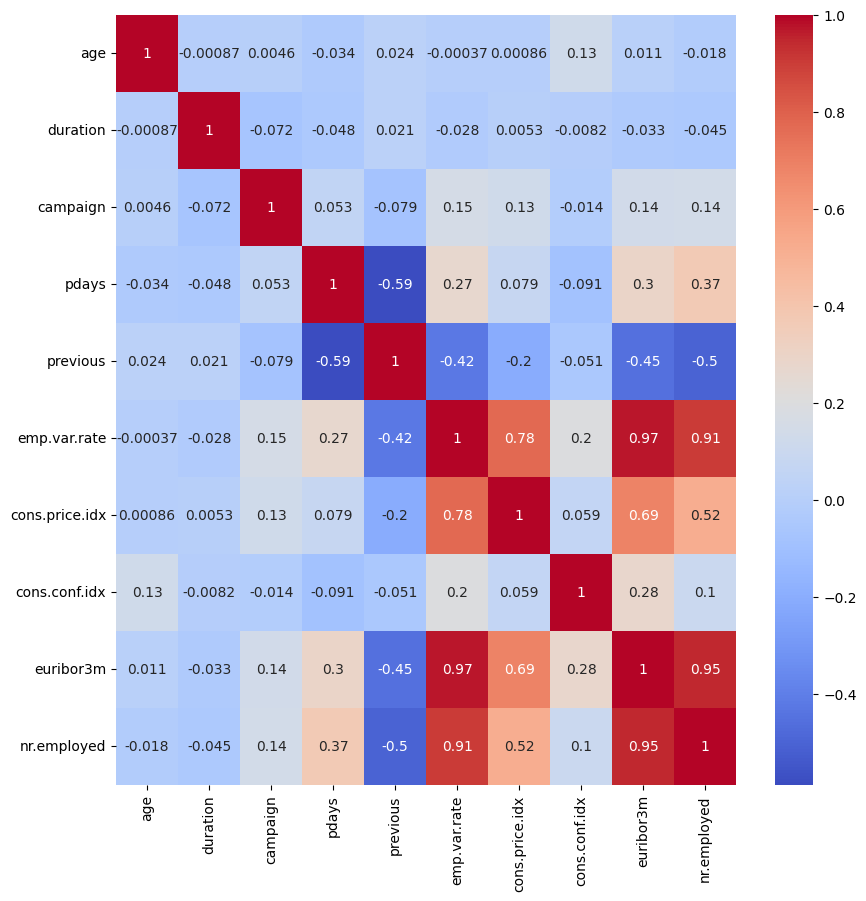

In [26]:
numerical_columns = data.select_dtypes(include=np.number)
corr= numerical_columns.corr()
corr.shape

plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

0 job


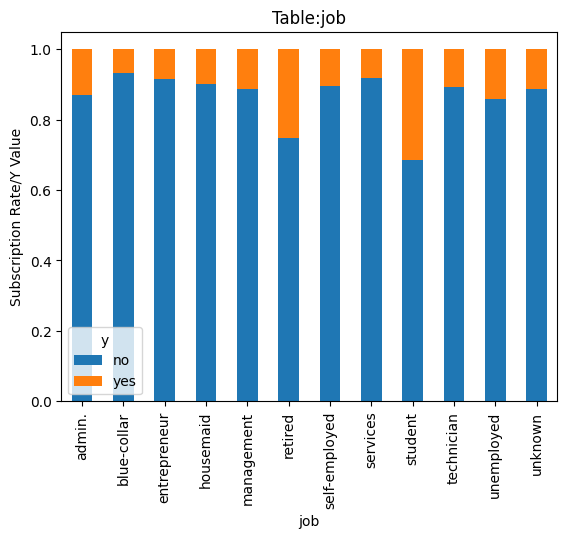

1 marital


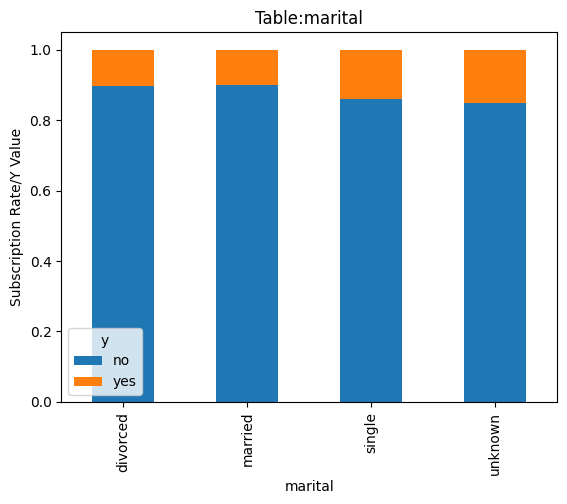

2 education


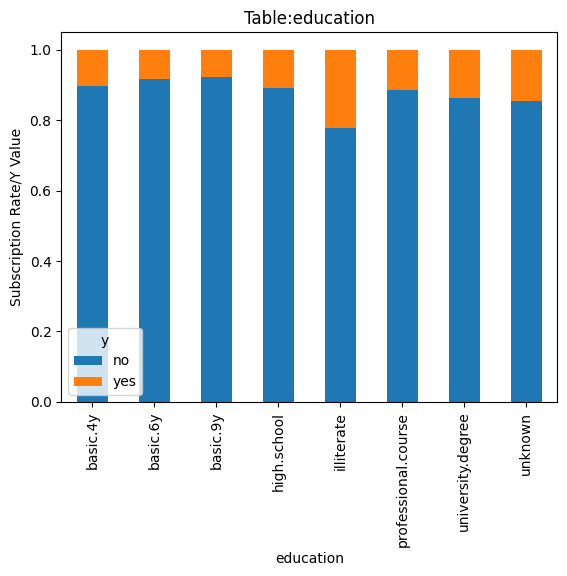

3 default


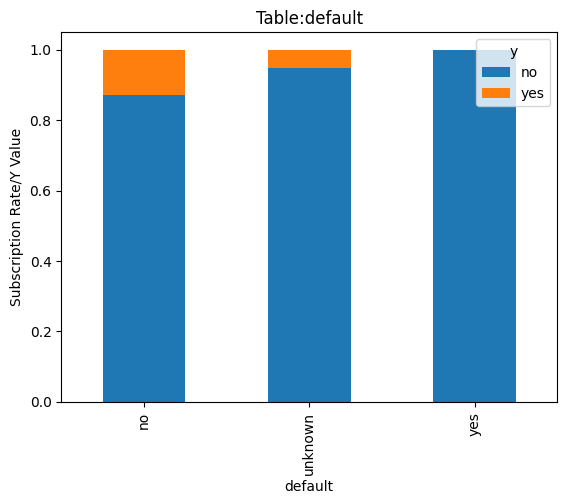

4 housing


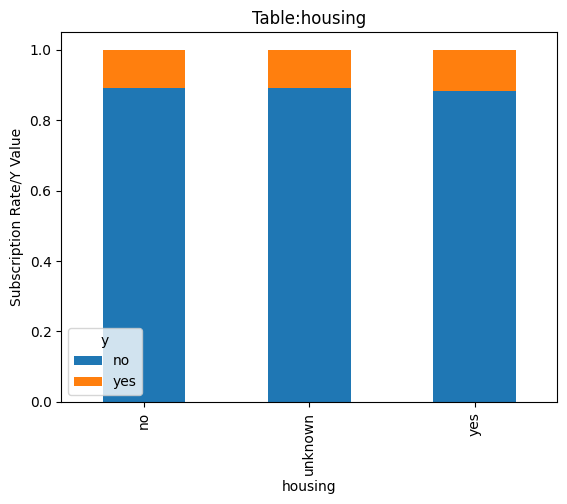

5 loan


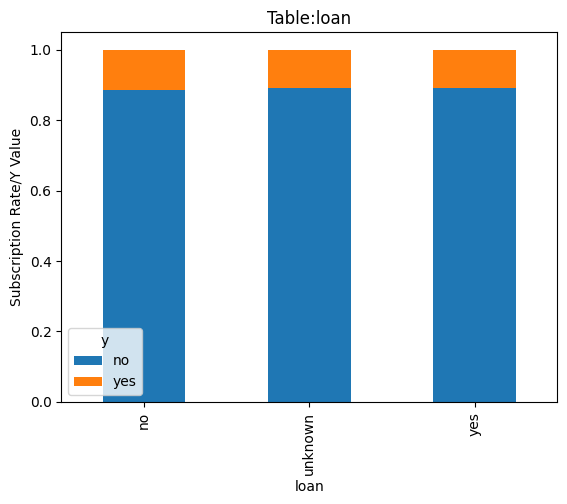

6 contact


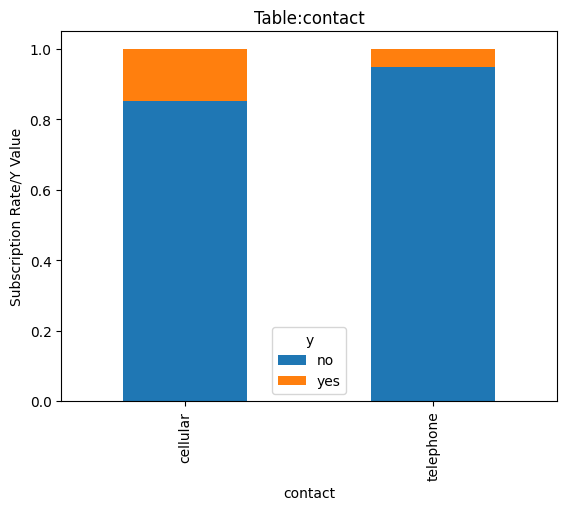

7 month


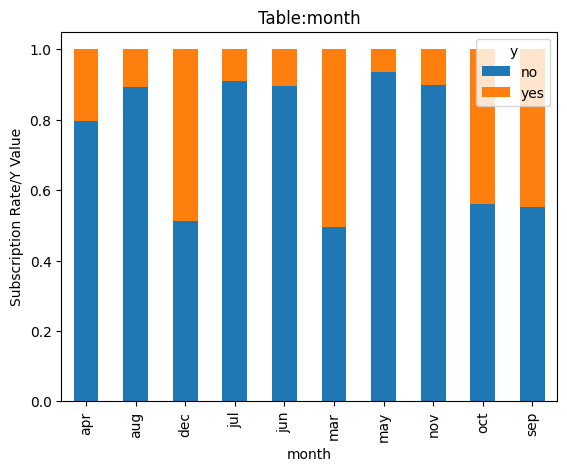

8 day_of_week


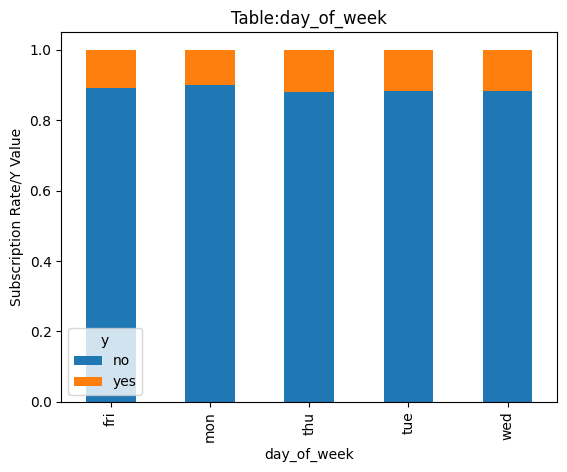

9 poutcome


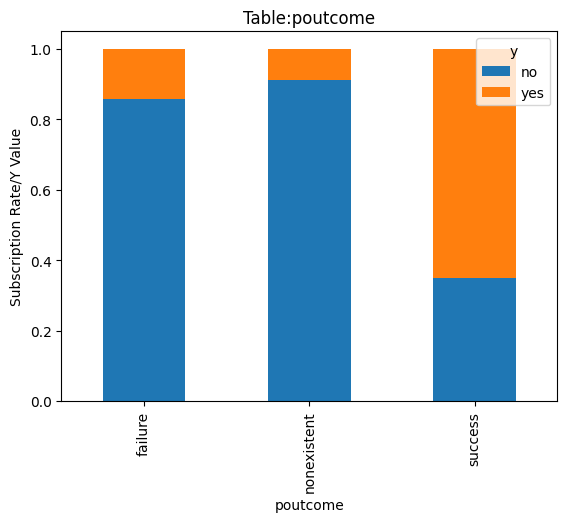

In [37]:
# Visualize the data
# Setting up the subplot grid


# Plotting each categorical feature in a subplot
for i,cat_column in enumerate(categorical_columns):
  print(i, cat_column)
  normalized_count= data.groupby(cat_column)['y'].value_counts(normalize=True)
  # normalized_count.unstack()
  #print(normalized_count)
  # Plotting the normalized counts as bar plots
  # plt.subplot(3,3,i+1)
  normalized_count.unstack().plot(kind='bar',stacked=True)
  plt.title("Table:"+cat_column)
  plt.xlabel(cat_column)
  plt.ylabel("Subscription Rate/Y Value")
  plt.show()
    # Setting title and labels


# Adjusting layout


# STEP 4: Feature Engineering

### 4.1 Do a correlation analysis of the data

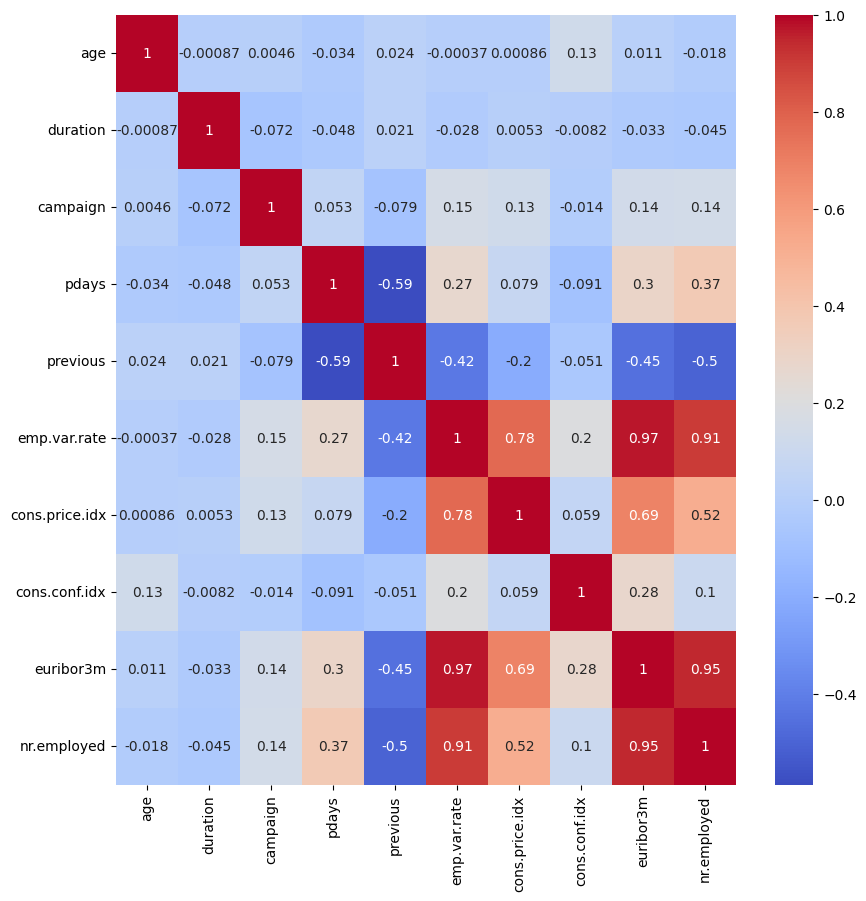

In [39]:
#Correlation analysis of the dataset
# Set the figure size to make the heatmap more readable
plt.figure(figsize=(10,10))

# Create a heatmap to visualize the correlation matrix of the numeric features in the dataset
sns.heatmap(numerical_columns.corr(),annot=True,cmap='coolwarm')
# Display the heatmap
plt.show()


### 4.2 Plot a heat map for the top 3 highly correlated variables

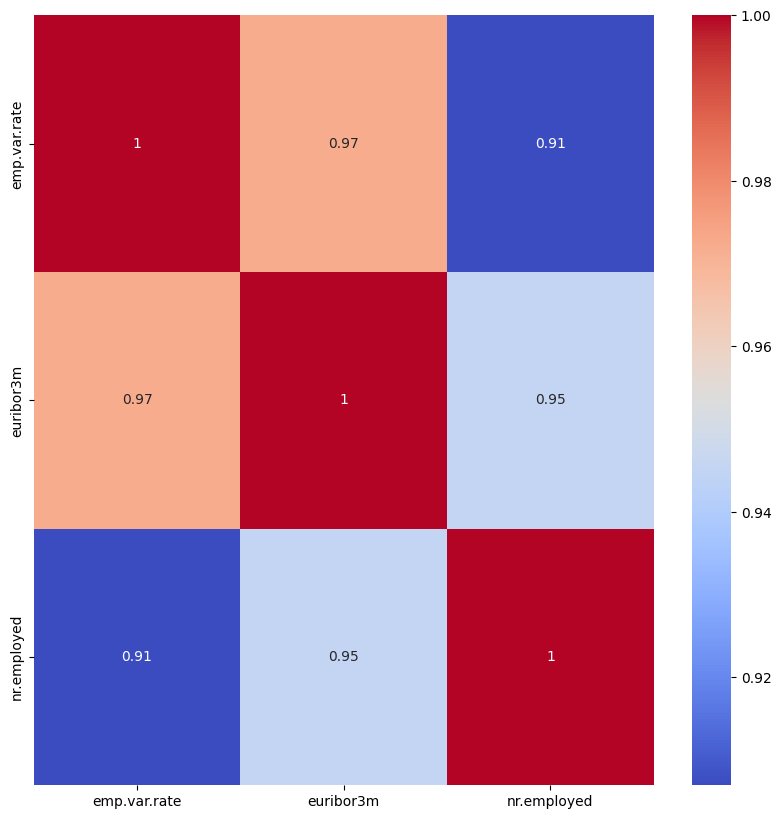

In [40]:
# Plot the Heat map for the top 3 correlated variables
corr_columns=["emp.var.rate","euribor3m","nr.employed"]
plt.figure(figsize=(10,10))
sns.heatmap(data[corr_columns].corr(),annot=True,cmap='coolwarm')
plt.show()

# STEP 5: Feature Engineering

### 5.1 Create a new feature `pdays999`

Create a new binary feature `pdays999` that indicates whether the pdays value is 999.

In the context of marketing data, `pdays=999` often represents customers who were not previously contacted. This feature might be more informative than the raw pdays values.

In [46]:
# Create a binary feature indicating if 'pdays' equals 999, which likely represents customers not previously contacted
print(data.pdays.dtype)
data['pdays999_new_feature']=data['pdays'].apply(lambda x:True if x==999 else False)

# View the new feature created
data['pdays999_new_feature'][:5]

int64


,pdays999_new_feature
0,True
1,True
2,True
3,True
4,True


## 5.2 Drop the original `pdays`column, `euribor3m`, `nr.employed` columns

In [47]:
# Dropping the original 'pdays' column since it's now represented by 'pdays999'
data.drop(columns=['pdays'],inplace=True)
# Dropping 'euribor3m', 'nr.employed' due to its high multicollinearity with  'emp.var.rate'
data.drop(columns=['euribor3m', 'nr.employed'])

# Display the first few rows of the updated dataframe to verify changes


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,y,pdays999_new_feature
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,nonexistent,1.1,93.994,-36.4,no,True
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,0,nonexistent,1.1,93.994,-36.4,no,True
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,nonexistent,1.1,93.994,-36.4,no,True
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,nonexistent,1.1,93.994,-36.4,no,True
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,nonexistent,1.1,93.994,-36.4,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,0,nonexistent,-1.1,94.767,-50.8,yes,True
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,0,nonexistent,-1.1,94.767,-50.8,no,True
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,0,nonexistent,-1.1,94.767,-50.8,no,True
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,0,nonexistent,-1.1,94.767,-50.8,yes,True


In [48]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays999_new_feature
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,True
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,True
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,True
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,True
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,True


### 5.3 Add the `pdays999` column to the list of categorical columns already created

In [49]:
# Append the column `pdays999` to the categorical columns list created already
categorical_columns.append('pdays999_new_feature')

# Check the list
print(categorical_columns)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'pdays999_new_feature']


### 5.4 Convert the categorical features to dummies and prepare for modelling

In [52]:
# Create dummies for categorical variables
dummy = pd.get_dummies(data=data ,columns=categorical_columns)

# Check the data
dummy.head()


,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,pdays999_new_feature_False,pdays999_new_feature_True
0,56,261,1,0,1.1,93.994,-36.4,4.857,5191.0,no,False,False,False,True,False,...,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True
1,57,149,1,0,1.1,93.994,-36.4,4.857,5191.0,no,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True
2,37,226,1,0,1.1,93.994,-36.4,4.857,5191.0,no,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True
3,40,151,1,0,1.1,93.994,-36.4,4.857,5191.0,no,True,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True
4,56,307,1,0,1.1,93.994,-36.4,4.857,5191.0,no,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True


### 5.5 Check for null values after the dummies creation & handle them if required

In [54]:
# Checking for null values
dummy.isna().sum()

,0
age,0
duration,0
campaign,0
previous,0
emp.var.rate,0
...,...
poutcome_failure,0
poutcome_nonexistent,0
poutcome_success,0
pdays999_new_feature_False,0


# STEP 6: Model Building

### 6.1 Split the data into train and test

In [55]:
# Separate the features (X) from the target variable (y)
X= dummy.drop(columns=['y'])
y= dummy['y']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Check the data
X_train.head()


,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,pdays999_new_feature_False,pdays999_new_feature_True
12556,40,94,2,0,1.4,93.918,-42.7,4.960,5228.1,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True
35451,31,116,4,0,-1.8,92.893,-46.2,1.244,5099.1,True,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True
30592,59,13,6,1,-1.8,92.893,-46.2,1.354,5099.1,False,False,False,False,False,True,...,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True
17914,43,94,5,0,1.4,93.918,-42.7,4.961,5228.1,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True
3315,39,344,2,0,1.1,93.994,-36.4,4.860,5191.0,True,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False,False,True,False,False,True


### 6.2 Build a Naive Bayes Classifier on the data


In [59]:
# Import the module
import numpy as np
from sklearn.naive_bayes import GaussianNB
# Initialize and train the Naive Bayes classifier

nb= GaussianNB()
nb.fit(X_train,y_train)

# Predict on the test set
yPred=nb.predict(X_test)

# Calculate accuracy
accuracy_score(y_test,yPred)

# Print the classification report
print(classification_report(y_test,yPred))
# Evaluate the model
print(confusion_matrix(y_test,yPred))
print("Accuracy :",accuracy_score(y_test,yPred))
print("Precision :",precision_score(y_test,yPred,pos_label='yes'))
print("Recall :",recall_score(y_test,yPred,pos_label='yes'))
print("F1 Score :",f1_score(y_test,yPred,pos_label='yes'))


              precision    recall  f1-score   support

          no       0.93      0.92      0.92      7303
         yes       0.43      0.49      0.46       935

    accuracy                           0.87      8238
   macro avg       0.68      0.70      0.69      8238
weighted avg       0.88      0.87      0.87      8238

[[6691  612]
 [ 479  456]]
Accuracy : 0.8675649429473173
Precision : 0.42696629213483145
Recall : 0.48770053475935826
F1 Score : 0.455317024463305


### 6.3 Build a Decision Tree Classifier with 'gini' as the criterion for split


In [60]:
# Import the library
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier with 'gini' as the criterion
dt= DecisionTreeClassifier(criterion='gini')

# Train the classifier on the training data
dt.fit(X_train,y_train)


# Predict on the test set
y_pred = dt.predict(X_test)


# Calculate accuracy
accuracy= accuracy_score(y_test,y_pred)
print(accuracy)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

0.887836853605244
Classification Report:
              precision    recall  f1-score   support

          no       0.94      0.93      0.94      7303
         yes       0.51      0.54      0.52       935

    accuracy                           0.89      8238
   macro avg       0.72      0.73      0.73      8238
weighted avg       0.89      0.89      0.89      8238



### 6.4 Build a Decision Tree Classifier with 'entropy' as the criterion for split




In [61]:
# Initialize the Decision Tree classifier with 'entropy' as the criterion
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(criterion='entropy')

# Train the classifier on the training data
dt.fit(X_train,y_train)

# Predict on the test set
y_pred =dt.predict(X_test)

# Calculate accuracy
accuracy= accuracy_score(y_test,y_pred)
print(accuracy)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


# Print the classification report


0.8877154649186696
Classification Report:
              precision    recall  f1-score   support

          no       0.94      0.93      0.94      7303
         yes       0.51      0.52      0.51       935

    accuracy                           0.89      8238
   macro avg       0.72      0.73      0.73      8238
weighted avg       0.89      0.89      0.89      8238

